In [1]:
import pandas as pd

dataset1 = pd.read_csv("../Results/Main_Bin1/units_Main_Bin1_2P-RndPar-High_nist_only.csv")
dataset2 = pd.read_csv("../Results/Main_Bin2/units_Main_Bin2_2P-RndPar-High_nist_only.csv")

In [2]:
units1=dataset1[["input.document_id","input.query_id", "input.bin", "nist_rel", "nist_rel_binary", "max_relevance_score", "crowd_rel_binary", "crowd_rel_ternary"]]
units2=dataset2[["input.document_id","input.query_id", "input.bin", "nist_rel", "nist_rel_binary", "max_relevance_score", "crowd_rel_binary", "crowd_rel_ternary"]]

In [3]:
frames = [units1, units2]
units = pd.concat(frames)

In [4]:
frames = [units1, units2]
units = pd.concat(frames)
totaldis = 0.0
for i in range(len(units.index)):
    if units["nist_rel_binary"].iloc[i] == units["crowd_rel_binary"].iloc[i]:
        totaldis = totaldis + 1.0
print(totaldis)

3742.0


In [5]:
frames = [units1, units2]
units = pd.concat(frames)
totaldis = 0.0
for i in range(len(units.index)):
    if units["nist_rel"].iloc[i] == units["crowd_rel_ternary"].iloc[i]:
        totaldis = totaldis + 1.0
print(totaldis)

3238.0


In [6]:
topics1 = list(units1["input.query_id"].unique())
topics2 = list(units2["input.query_id"].unique())
topics = list(units["input.query_id"].unique())

In [7]:
disagreement1 = []
totaldis = 0.0
for item in topics1:
    row = [item]
    
    subset = units1[units1["input.query_id"] == item]
    dis = 0.0
    for i in range(len(subset.index)):
        if subset["nist_rel_binary"].iloc[i] != subset["crowd_rel_binary"].iloc[i]:
            dis = dis + 1.0
            totaldis = totaldis + 1.0
    row.append(dis/len(subset))
    
    disagreement1.append(row)

print(totaldis)

1021.0


In [8]:
import numpy as np

disagreement1b = pd.DataFrame(np.array(disagreement1), columns = ['topic_id', 'disagreement1_binary'])
disagreement1b = disagreement1b.sort_values(['disagreement1_binary'], ascending=False)
disagreement1b.topic_id = disagreement1b.topic_id.astype(int)
disagreement1b

,topic_id,disagreement1_binary
16,341,0.552632
15,435,0.536232
25,646,0.509434
2,307,0.500000
46,372,0.486486
36,400,0.463415
39,378,0.461538
8,443,0.460317
10,347,0.456790
33,336,0.454545


In [9]:
disagreement1 = []
totaldis = 0.0
for item in topics1:
    row = [item]
    
    subset = units1[units1["input.query_id"] == item]
    dis = 0.0
    for i in range(len(subset.index)):
        if subset["nist_rel"].iloc[i] != subset["crowd_rel_ternary"].iloc[i]:
            dis = dis + 1.0
            totaldis = totaldis + 1.0
    row.append(dis/len(subset))
    
    disagreement1.append(row)

print(totaldis)

1394.0


In [10]:
import numpy as np

disagreement1t = pd.DataFrame(np.array(disagreement1), columns = ['topic_id', 'disagreement1_ternary'])
disagreement1t = disagreement1t.sort_values(['disagreement1_ternary'], ascending=False)
disagreement1t.topic_id = disagreement1t.topic_id.astype(int)
disagreement1t

,topic_id,disagreement1_ternary
2,307,0.708333
46,372,0.675676
16,341,0.671053
22,614,0.666667
13,354,0.642857
49,416,0.640000
8,443,0.619048
5,330,0.611940
32,353,0.590164
11,408,0.580645


In [11]:
disagreement2 = []
for item in topics2:
    row = [item]
    
    subset = units2[units2["input.query_id"] == item]
    dis = 0.0
    for i in range(len(subset.index)):
        if subset["nist_rel_binary"].iloc[i] != subset["crowd_rel_binary"].iloc[i]:
            dis = dis + 1.0
    row.append(dis/len(subset))
    
    disagreement2.append(row)

In [12]:
disagreement2b = pd.DataFrame(np.array(disagreement2), columns = ['topic_id', 'disagreement2_binary'])
disagreement2b = disagreement2b.sort_values(['disagreement2_binary'], ascending=False)
disagreement2b.topic_id = disagreement2b.topic_id.astype(int)
disagreement2b

,topic_id,disagreement2_binary
48,372,0.623188
47,378,0.614286
44,345,0.607595
1,443,0.577320
18,307,0.565217
46,416,0.550000
5,436,0.538462
16,646,0.521739
0,422,0.520000
33,362,0.493333


In [13]:
disagreement2 = []
for item in topics2:
    row = [item]
    
    subset = units2[units2["input.query_id"] == item]
    dis = 0.0
    for i in range(len(subset.index)):
        if subset["nist_rel"].iloc[i] != subset["crowd_rel_ternary"].iloc[i]:
            dis = dis + 1.0
    row.append(dis/len(subset))
    
    disagreement2.append(row)

In [14]:
disagreement2t = pd.DataFrame(np.array(disagreement2), columns = ['topic_id', 'disagreement2_ternary'])
disagreement2t = disagreement2t.sort_values(['disagreement2_ternary'], ascending=False)
disagreement2t.topic_id = disagreement2t.topic_id.astype(int)
disagreement2t

,topic_id,disagreement2_ternary
48,372,0.695652
46,416,0.650000
1,443,0.628866
47,378,0.628571
44,345,0.620253
0,422,0.600000
24,393,0.587302
18,307,0.586957
33,362,0.586667
5,436,0.584615


In [15]:
disagreement = []
for item in topics:
    row = [item]
    
    subset = units[units["input.query_id"] == item]
    dis = 0.0
    for i in range(len(subset.index)):
        if subset["nist_rel_binary"].iloc[i] != subset["crowd_rel_binary"].iloc[i]:
            dis = dis + 1.0
    row.append(dis/len(subset))
    
    disagreement.append(row)

In [16]:
disagreementb = pd.DataFrame(np.array(disagreement), columns = ['topic_id', 'disagreement_binary'])
disagreementb = disagreementb.sort_values(['disagreement_binary'], ascending=False)
disagreementb.topic_id = disagreementb.topic_id.astype(int)
disagreementb

,topic_id,disagreement_binary
46,372,0.575472
39,378,0.559633
2,307,0.531915
8,443,0.531250
25,646,0.515152
9,345,0.496503
44,375,0.449438
49,416,0.422222
31,423,0.416667
10,347,0.409639


In [17]:
disagreement = []
for item in topics:
    row = [item]
    
    subset = units[units["input.query_id"] == item]
    dis = 0.0
    for i in range(len(subset.index)):
        if subset["nist_rel"].iloc[i] != subset["crowd_rel_ternary"].iloc[i]:
            dis = dis + 1.0
    row.append(dis/len(subset))
    
    disagreement.append(row)

In [18]:
disagreementt = pd.DataFrame(np.array(disagreement), columns = ['topic_id', 'disagreement_ternary'])
disagreementt = disagreementt.sort_values(['disagreement_ternary'], ascending=False)
disagreementt.topic_id = disagreementt.topic_id.astype(int)
disagreementt

,topic_id,disagreement_ternary
46,372,0.688679
2,307,0.648936
49,416,0.644444
8,443,0.625000
39,378,0.605505
13,354,0.602273
43,422,0.572650
37,393,0.571429
47,362,0.563025
44,375,0.528090


In [19]:
dis_binary_df = pd.merge(disagreementb, disagreement1b, on=['topic_id', 'topic_id'])
dis_binary_df = pd.merge(dis_binary_df, disagreement2b, on=['topic_id', 'topic_id'])
dis_binary_df.topic_id = dis_binary_df.topic_id.astype(int)
dis_binary_df

,topic_id,disagreement_binary,disagreement1_binary,disagreement2_binary
0,372,0.575472,0.486486,0.623188
1,378,0.559633,0.461538,0.614286
2,307,0.531915,0.500000,0.565217
3,443,0.531250,0.460317,0.577320
4,646,0.515152,0.509434,0.521739
5,345,0.496503,0.359375,0.607595
6,375,0.449438,0.375000,0.491228
7,416,0.422222,0.320000,0.550000
8,423,0.416667,0.315789,0.452830
9,347,0.409639,0.456790,0.364706


In [20]:
dis_ternary_df = pd.merge(disagreementt, disagreement1t, on=['topic_id', 'topic_id'])
dis_ternary_df = pd.merge(dis_ternary_df, disagreement2t, on=['topic_id', 'topic_id'])
dis_ternary_df.topic_id = dis_ternary_df.topic_id.astype(int)
dis_ternary_df

,topic_id,disagreement_ternary,disagreement1_ternary,disagreement2_ternary
0,372,0.688679,0.675676,0.695652
1,307,0.648936,0.708333,0.586957
2,416,0.644444,0.640000,0.650000
3,443,0.625000,0.619048,0.628866
4,378,0.605505,0.564103,0.628571
5,354,0.602273,0.642857,0.551282
6,422,0.572650,0.552239,0.600000
7,393,0.571429,0.558442,0.587302
8,362,0.563025,0.522727,0.586667
9,375,0.528090,0.468750,0.561404


In [22]:
dis_df = pd.merge(dis_binary_df, dis_ternary_df, on=['topic_id', 'topic_id'])
dis_df.topic_id = dis_df.topic_id.astype(int)
dis_df

,topic_id,disagreement_binary,disagreement1_binary,disagreement2_binary,disagreement_ternary,disagreement1_ternary,disagreement2_ternary
0,372,0.575472,0.486486,0.623188,0.688679,0.675676,0.695652
1,378,0.559633,0.461538,0.614286,0.605505,0.564103,0.628571
2,307,0.531915,0.500000,0.565217,0.648936,0.708333,0.586957
3,443,0.531250,0.460317,0.577320,0.625000,0.619048,0.628866
4,646,0.515152,0.509434,0.521739,0.525253,0.509434,0.543478
5,345,0.496503,0.359375,0.607595,0.510490,0.375000,0.620253
6,375,0.449438,0.375000,0.491228,0.528090,0.468750,0.561404
7,416,0.422222,0.320000,0.550000,0.644444,0.640000,0.650000
8,423,0.416667,0.315789,0.452830,0.472222,0.421053,0.490566
9,347,0.409639,0.456790,0.364706,0.481928,0.567901,0.400000


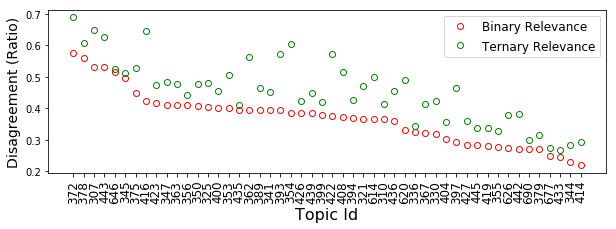

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 10, 3

plt.plot(dis_df.index, dis_df["disagreement_binary"], 'ro', markerfacecolor='None', lw = 2, label = "Binary Relevance")
plt.plot(dis_df.index, dis_df["disagreement_ternary"], 'go', markerfacecolor='None', lw = 2, label = "Ternary Relevance")

plt.xticks(dis_df.index, dis_df["topic_id"], rotation='vertical', fontsize=12)

plt.legend(fontsize=12)

plt.ylabel('Disagreement (Ratio)', fontsize=14)
plt.xlabel('Topic Id',fontsize=16)
plt.savefig("../Plots/disagreement_per_topic_b_and_t.png")
plt.show()